## LAKA SHRINATH YADAV
## EP21BTECH11018

## q1 Plot the Radial Wave function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import factorial, genlaguerre

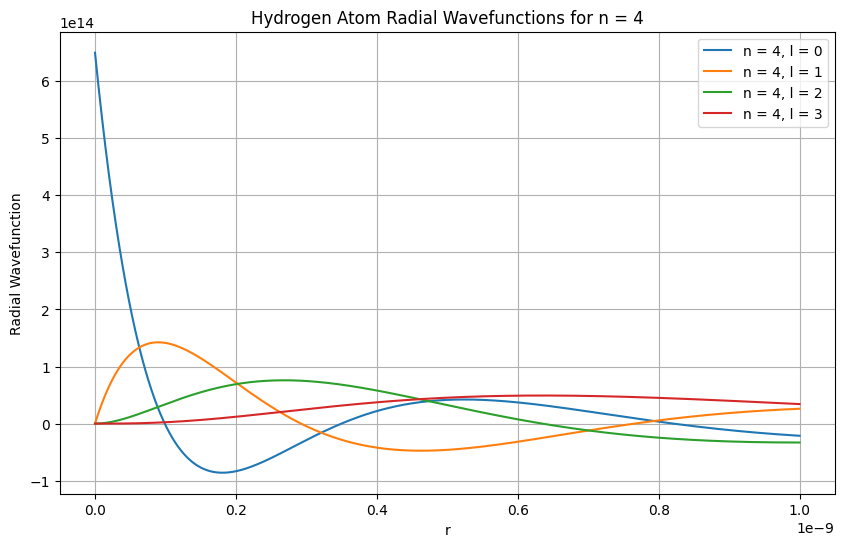

In [5]:
def hydrogen_radial_wavefunction(n, l, r):
    a0 = 0.529e-10
    prefactor = np.sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    exponential_term = np.exp(-r / (n * a0))
    laguerre_term = genlaguerre(n - l - 1, 2 * l + 1)(2 * r / (n * a0))
    return prefactor * exponential_term * ((2 * r) / (n * a0))**l * laguerre_term
def plot_radial_wavefunctions(n):
    r = np.linspace(0, 10e-10, 10000)
    plt.figure(figsize=(10, 6))
    for l in range(n):
        radial_wf = np.real(hydrogen_radial_wavefunction(n, l, r))
        plt.plot(r, radial_wf, label=f'n = {n}, l = {l}')
    plt.xlabel('r')
    plt.ylabel('Radial Wavefunction')
    plt.legend()
    plt.grid(True)
    plt.title(f'Hydrogen Atom Radial Wavefunctions for n = {n}')
    plt.show()

n_input = int(input("Enter the principal quantum number (n): "))
plot_radial_wavefunctions(n_input)

## Q2 generate plots for sci^2 n = 1,2 and 3 and all values of l and m

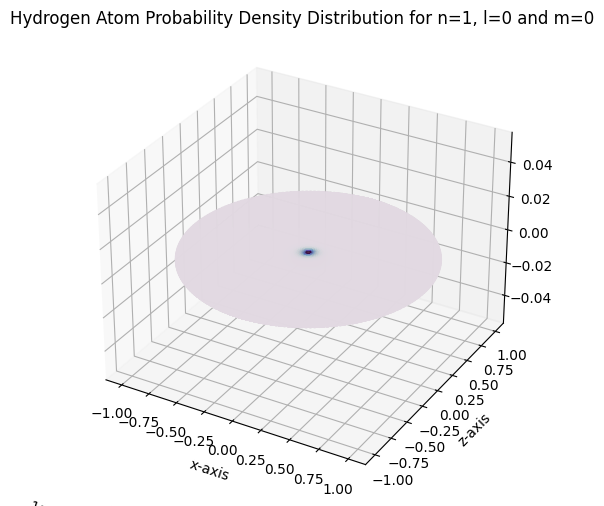

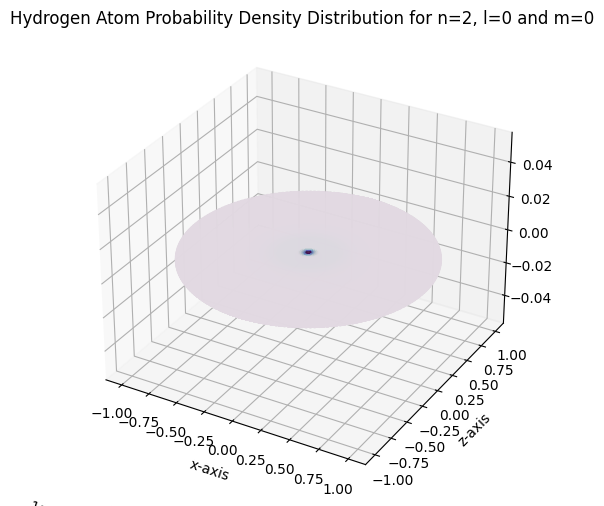

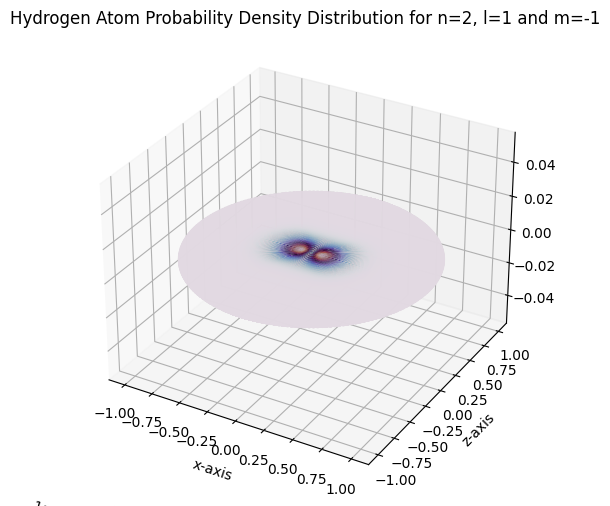

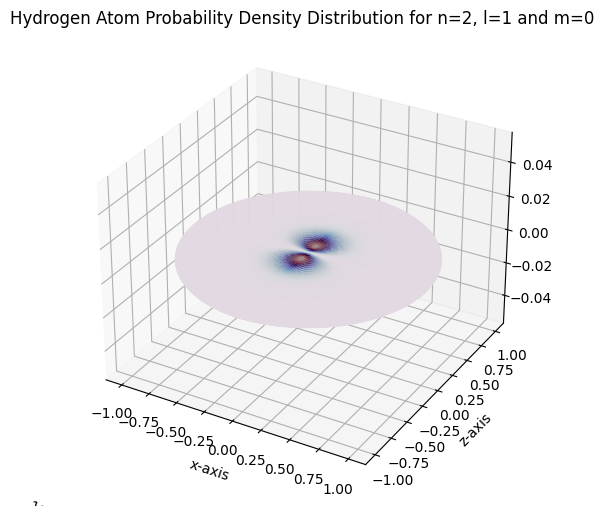

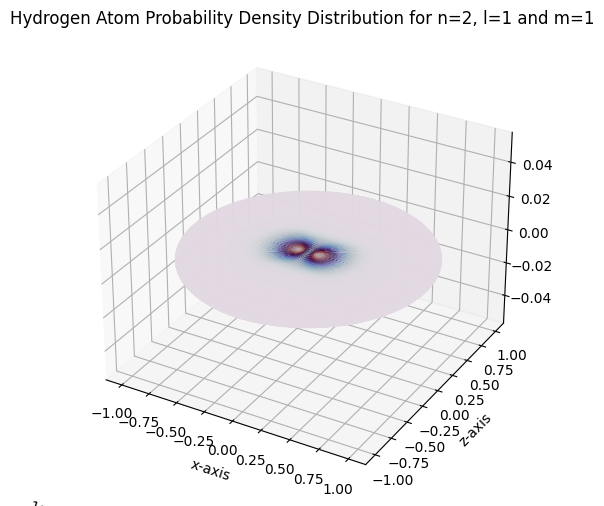

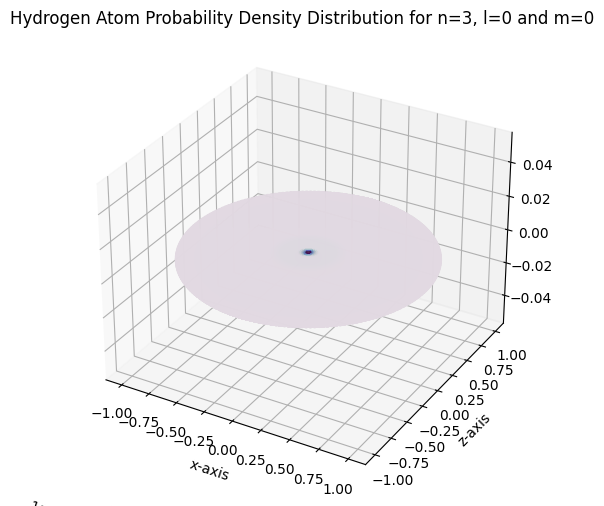

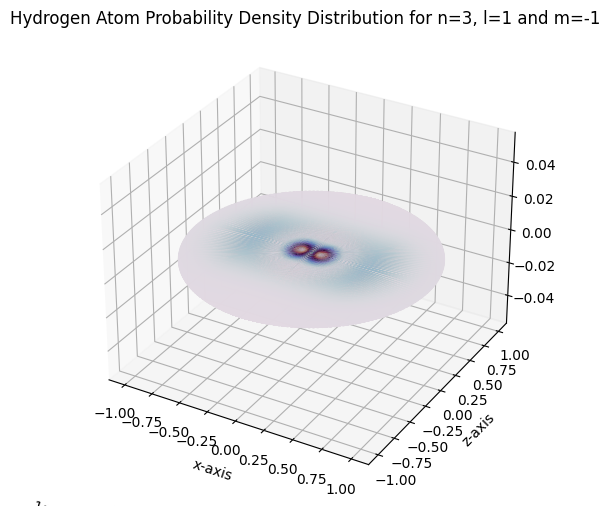

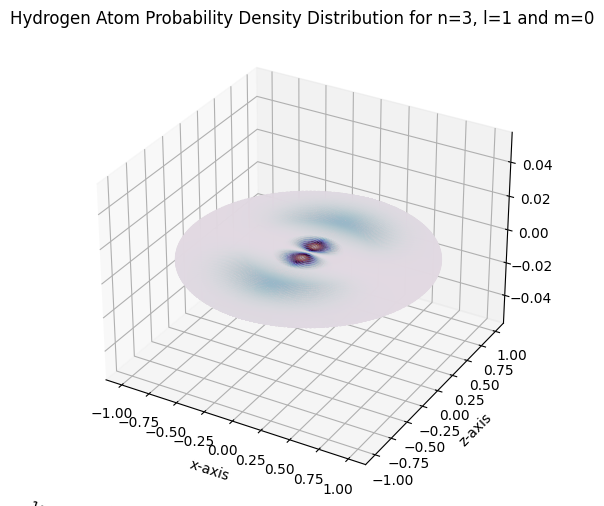

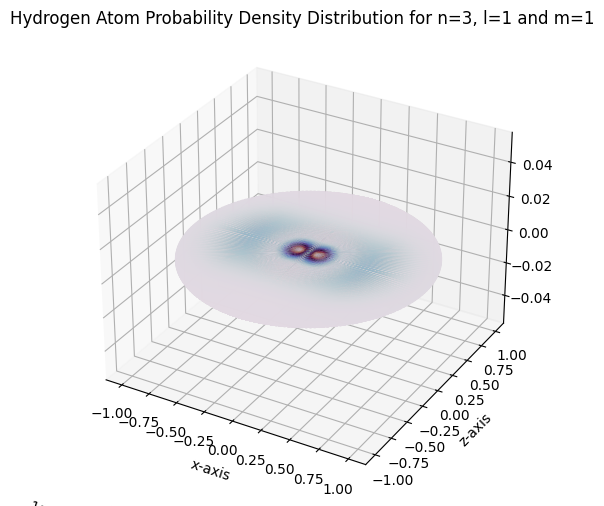

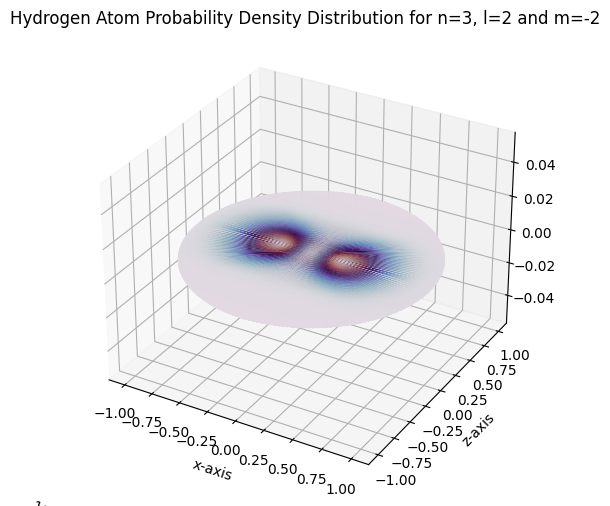

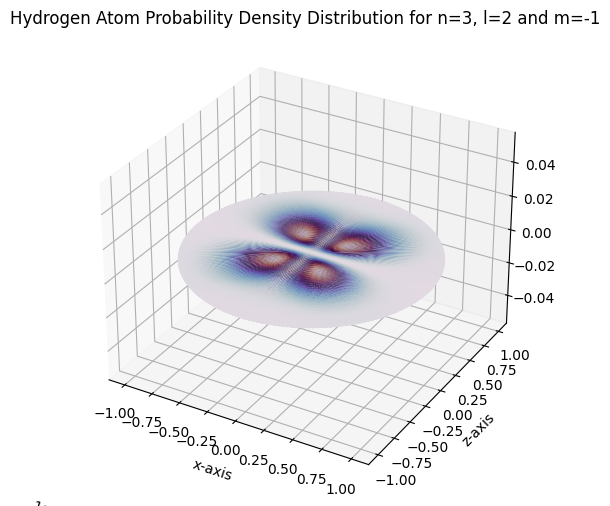

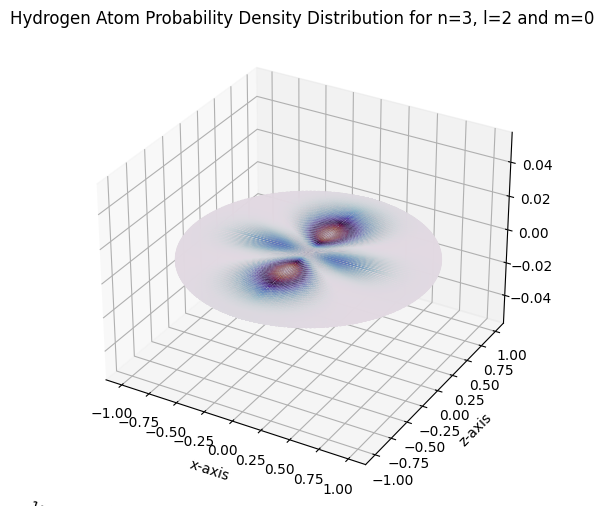

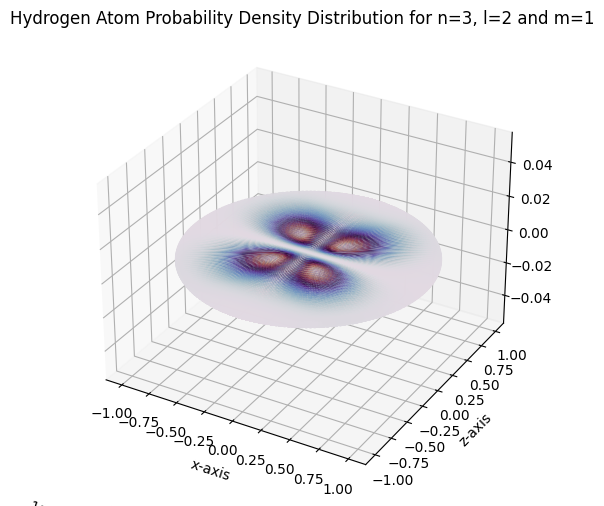

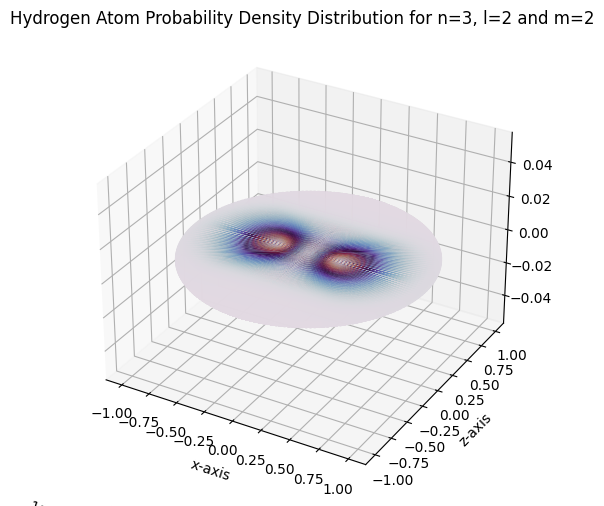

In [9]:
def orbital(r, theta, phi, n, l, m):
    bohr_radius = 0.529e-10
    prefactor = np.sqrt((2 / (n * bohr_radius)) ** 3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    x = 2 * r / (n * bohr_radius)
    laguerre_term = genlaguerre(n - l - 1, 2 * l + 1)(x)
    radial_wave_term = prefactor * (x ** l) * np.exp(-x / 2) * laguerre_term
    angular_term = sph_harm(m, l, phi, theta)
    return np.abs(radial_wave_term * angular_term)**2

r = np.linspace(0, 10e-10, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
R, Theta, Phi = np.meshgrid(r, theta, phi, indexing='ij')

for n in range(1,4):
    for l in range(0, n):
        for m in range(-l,l+1):
            s_orbital = orbital(R, Theta, Phi, n, l, m)
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(R * np.sin(Theta) * np.sin(Phi), R * np.cos(Theta), c = s_orbital, cmap = 'twilight')
            ax.set_title(f'Hydrogen Atom Probability Density Distribution for n={n}, l={l} and m={m}')
            ax.set_xlabel('x-axis')
            ax.set_ylabel('z-axis')
            plt.show()
